# Evaluation Project - 10
Insurance Claims- Fraud Detection
Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from sklearn.impute import SimpleImputer
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Automobile_insurance_fraud.csv")
df.head(25)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.drop(['_c39'],axis = 1 ,inplace = True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [7]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [9]:
df["incident_location"].value_counts()

1306 Andromedia St     1
5249 4th Ave           1
3925 Sky St            1
4866 4th Hwy           1
6676 Tree Lane         1
                      ..
8212 Rock Ave          1
8954 Apache Lane       1
2318 Washington Hwy    1
6638 Tree Drive        1
6724 Andromedia St     1
Name: incident_location, Length: 1000, dtype: int64

### Data Visualization

<AxesSubplot:>

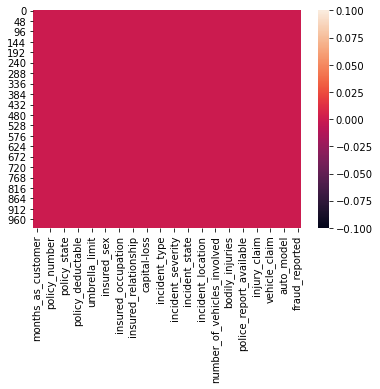

In [10]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

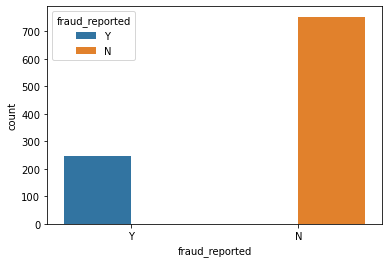

In [11]:
sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

As per above plot we can see that dataset is imbalanced

In [12]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Fraud_reported people are less compared to Fraud_not_reported

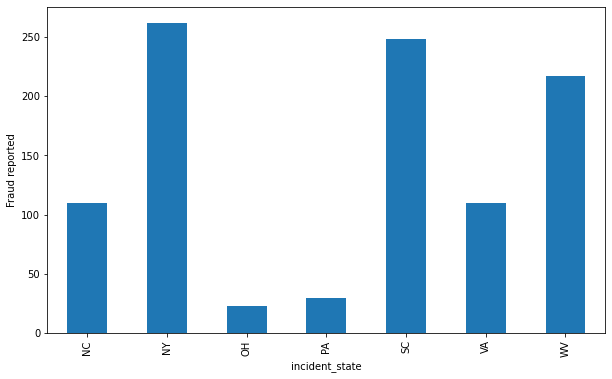

In [13]:
fig=plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

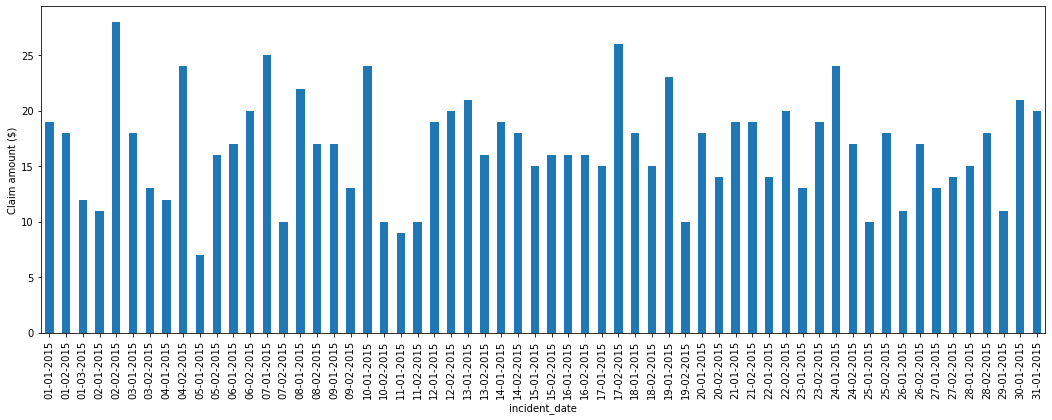

In [14]:
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

We see that, all the cases in above plot are for the months of January and February 2015

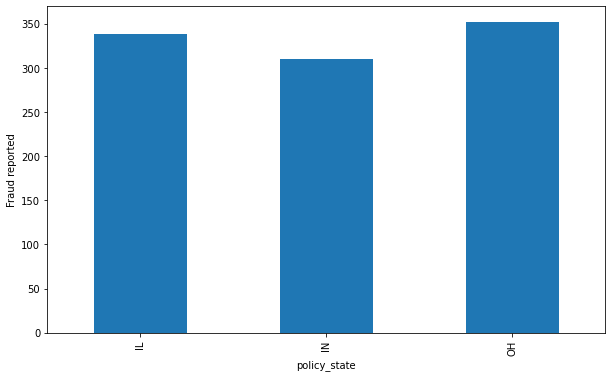

In [15]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

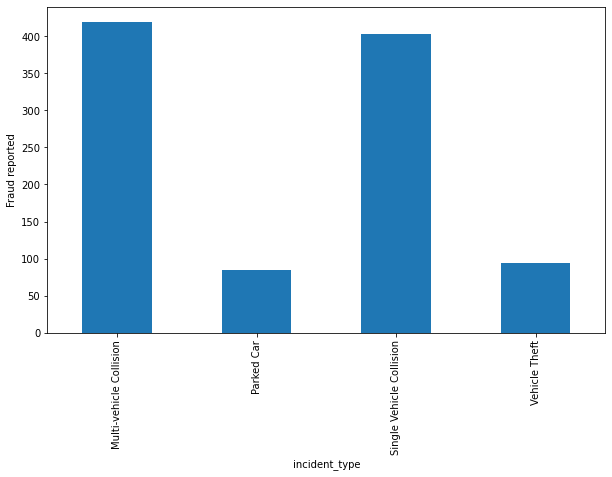

In [16]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

Most Fraud are reported as Multiple Vehicle Collision

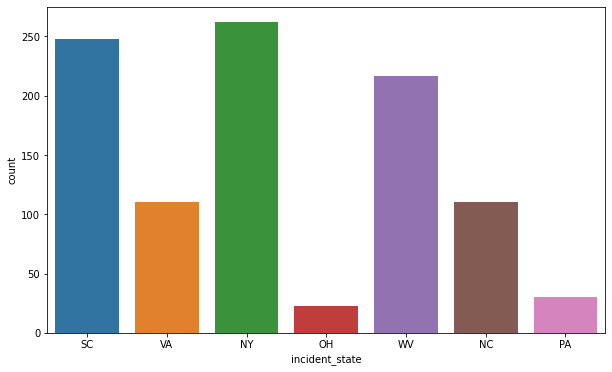

In [17]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

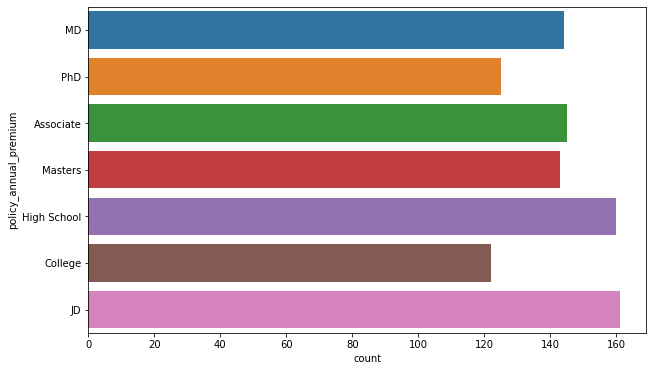

In [18]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

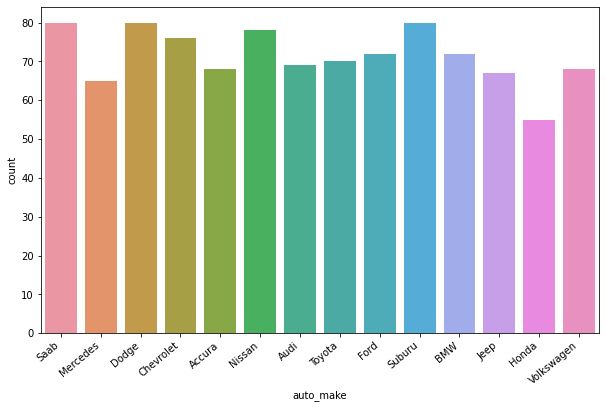

In [19]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

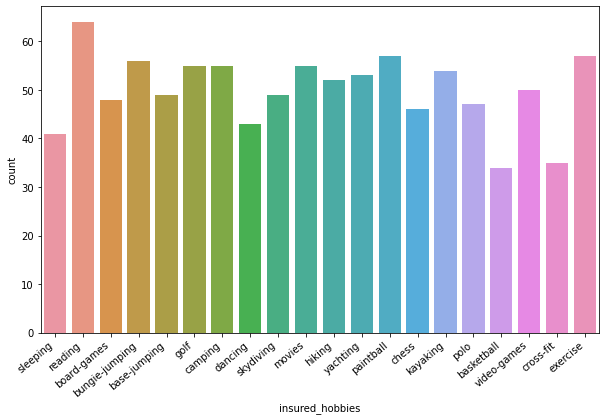

In [20]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [21]:
df["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

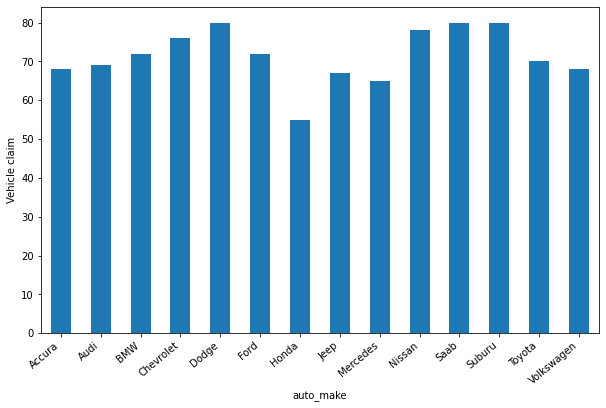

In [22]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

auto_year has 21 levels, and the number of records for each of the levels are quite significant considering datasize is not so large. We will do some feature engineering using this variable considering, the year of manufacturing of automobile indicates the age of the vehicle and may contain valuable information for insurance premium or fraud is concerned.

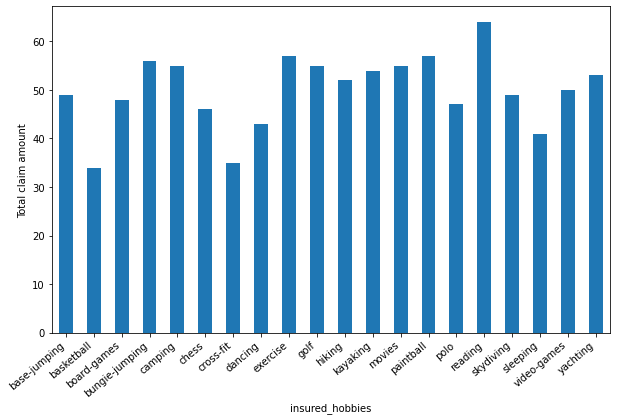

In [23]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [24]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [25]:
df[['insured_zip']] = df[['insured_zip']].astype(object)

In [26]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000



Some variables such as 'policy_bind_date', 'incident_date', 'incident_location' and 'insured_zip' contain very high number of level. We will remove these columns for our purposes

In [27]:
df.auto_year.value_counts() 

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [28]:
df['vehicle_age'] = 2018 - df['auto_year'] 
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [29]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [30]:
# Check on categorical variables:
df.select_dtypes(include=['object']).columns  

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'incident_period_of_day'],
      dtype='object')

In [31]:

# dropping unimportant columns

df = df.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location',  
    'auto_year', 
    'incident_hour_of_the_day'])

df.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,1,14,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,1,11,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,RAM,0,11,morning
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1,4,early_morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,NO,6500,1300,650,4550,Accura,RSX,0,9,evening


In [32]:

# identify variables with '?' values
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
incident_period_of_day     0



collision_type, property_damage, police_report_available contain many missing values. So, first isolate these variables, inspect these individually for spread of category values

In [33]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

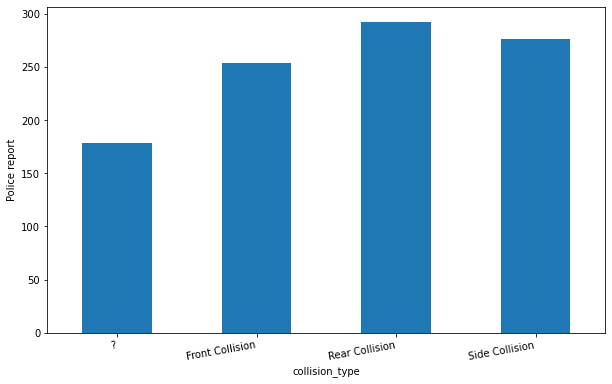

In [34]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()


In [35]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

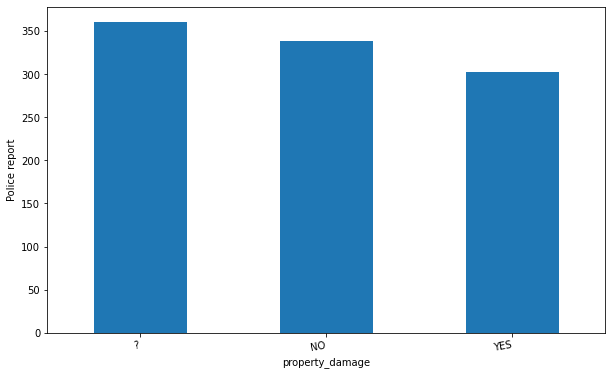

In [36]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [37]:
df.police_report_available.value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [38]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'vehicle_age',
       'incident_period_of_day'],
      dtype='object')

In [39]:
df.columns.value_counts()

collision_type                 1
months_as_customer             1
policy_csl                     1
insured_occupation             1
incident_type                  1
capital-gains                  1
vehicle_claim                  1
fraud_reported                 1
insured_education_level        1
auto_model                     1
incident_state                 1
insured_hobbies                1
incident_severity              1
vehicle_age                    1
injury_claim                   1
number_of_vehicles_involved    1
incident_period_of_day         1
insured_sex                    1
bodily_injuries                1
capital-loss                   1
umbrella_limit                 1
authorities_contacted          1
police_report_available        1
policy_state                   1
insured_relationship           1
policy_deductable              1
auto_make                      1
property_claim                 1
incident_city                  1
age                            1
property_d

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [41]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model

In [42]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])
    df

In [44]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,299,29,2,1,1,732,1,1,4,2,...,2,563,258,512,545,10,1,1,11,1
1,212,23,1,1,2,396,5,1,4,6,...,0,44,46,45,38,8,12,1,8,4
2,123,10,2,0,2,740,5,0,6,11,...,1,143,337,104,116,4,30,0,8,4
3,239,22,0,1,2,743,6,0,6,1,...,1,451,245,249,521,3,34,1,1,1
4,212,25,0,2,1,902,6,1,0,11,...,1,81,70,36,66,0,31,0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,19,2,2,1,577,1,0,5,2,...,0,705,624,379,664,6,6,0,9,2
996,266,22,0,0,1,765,1,0,6,9,...,0,760,630,608,714,13,28,0,0,5
997,119,15,2,1,0,691,3,0,5,1,...,2,507,324,330,554,11,19,0,19,1
998,377,43,0,2,2,652,5,1,0,5,...,2,224,168,170,256,1,5,0,17,6


In [45]:
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

Empty DataFrame
Columns: []
Index: []


In [46]:
df.describe(include='all')

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,184.283000,19.948000,1.01400,0.951000,0.965000,495.735000,1.900000,0.463000,2.966000,6.653000,...,0.971000,368.330000,289.050000,287.730000,347.164000,6.546000,19.318000,0.247000,9.897000,2.822000
std,99.894954,9.140287,0.83096,0.804516,0.805247,285.876467,1.917205,0.498879,1.948497,4.019048,...,0.810442,218.145411,189.104368,182.969481,209.404851,4.034869,11.136107,0.431483,6.015861,2.187945
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.750000,13.000000,0.00000,0.000000,0.000000,247.750000,1.000000,0.000000,1.000000,3.000000,...,0.000000,183.750000,123.750000,127.750000,163.750000,3.000000,10.000000,0.000000,5.000000,1.000000
50%,185.500000,19.000000,1.00000,1.000000,1.000000,496.500000,1.000000,0.000000,3.000000,7.000000,...,1.000000,372.500000,276.500000,281.000000,351.500000,7.000000,20.000000,0.000000,10.000000,3.000000
75%,257.250000,25.000000,2.00000,2.000000,2.000000,742.250000,1.000000,1.000000,5.000000,10.000000,...,2.000000,548.250000,455.250000,446.250000,523.250000,10.000000,29.000000,0.000000,15.000000,5.000000
max,390.000000,45.000000,2.00000,2.000000,2.000000,990.000000,10.000000,1.000000,6.000000,13.000000,...,2.000000,762.000000,637.000000,625.000000,725.000000,13.000000,38.000000,1.000000,20.000000,6.000000


In [47]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
months_as_customer,1.000000,0.911296,-0.000783,-0.026295,0.016873,0.014294,0.017145,0.059153,0.000265,0.010330,...,0.020082,0.055934,0.064041,0.029788,0.052742,0.044443,0.001095,0.017095,-0.002020,-0.054275
age,0.911296,1.000000,-0.014533,-0.015185,0.020561,0.017822,0.021924,0.073337,0.000969,0.017220,...,0.014661,0.071265,0.075124,0.060450,0.059784,0.030410,0.017343,0.012143,-0.001354,-0.022988
policy_state,-0.000783,-0.014533,1.000000,0.001027,0.008213,0.014751,-0.031793,-0.020481,-0.034327,-0.031215,...,0.071950,-0.015990,-0.042685,0.009282,-0.007492,0.017124,-0.025253,0.029432,-0.002114,-0.034415
policy_csl,-0.026295,-0.015185,0.001027,1.000000,0.001986,0.017161,0.022779,-0.010757,0.009153,0.015788,...,0.002424,-0.043541,-0.076419,-0.041428,-0.027320,-0.004701,0.047885,-0.037190,0.033082,0.002433
policy_deductable,0.016873,0.020561,0.008213,0.001986,1.000000,0.003182,0.009402,-0.011948,0.012000,-0.053245,...,0.030654,0.020877,0.028482,0.058976,0.004261,-0.030775,-0.003892,0.007620,-0.024921,0.013505
policy_annual_premium,0.014294,0.017822,0.014751,0.017161,0.003182,1.000000,-0.003712,0.034839,-0.016601,0.028204,...,0.014816,-0.001025,-0.021839,-0.006593,0.009413,0.007216,-0.030185,-0.015261,0.031015,-0.004169
umbrella_limit,0.017145,0.021924,-0.031793,0.022779,0.009402,-0.003712,1.000000,0.009733,-0.019668,0.024072,...,-0.055340,-0.036495,-0.048003,-0.018668,-0.031991,-0.007169,0.042421,0.057719,-0.010528,0.004104
insured_sex,0.059153,0.073337,-0.020481,-0.010757,-0.011948,0.034839,0.009733,1.000000,0.009002,-0.006160,...,0.020864,-0.021761,0.001792,-0.009003,-0.031984,0.026457,-0.018421,0.030873,0.028247,-0.039054
insured_education_level,0.000265,0.000969,-0.034327,0.009153,0.012000,-0.016601,-0.019668,0.009002,1.000000,-0.020298,...,0.036141,0.073526,0.079108,0.057098,0.071132,0.055202,0.049445,0.008808,-0.043509,0.023937
insured_occupation,0.010330,0.017220,-0.031215,0.015788,-0.053245,0.028204,0.024072,-0.006160,-0.020298,1.000000,...,-0.011083,0.010091,0.024307,0.000353,0.003834,0.042621,0.020584,0.001564,0.006676,0.052618


<AxesSubplot:>

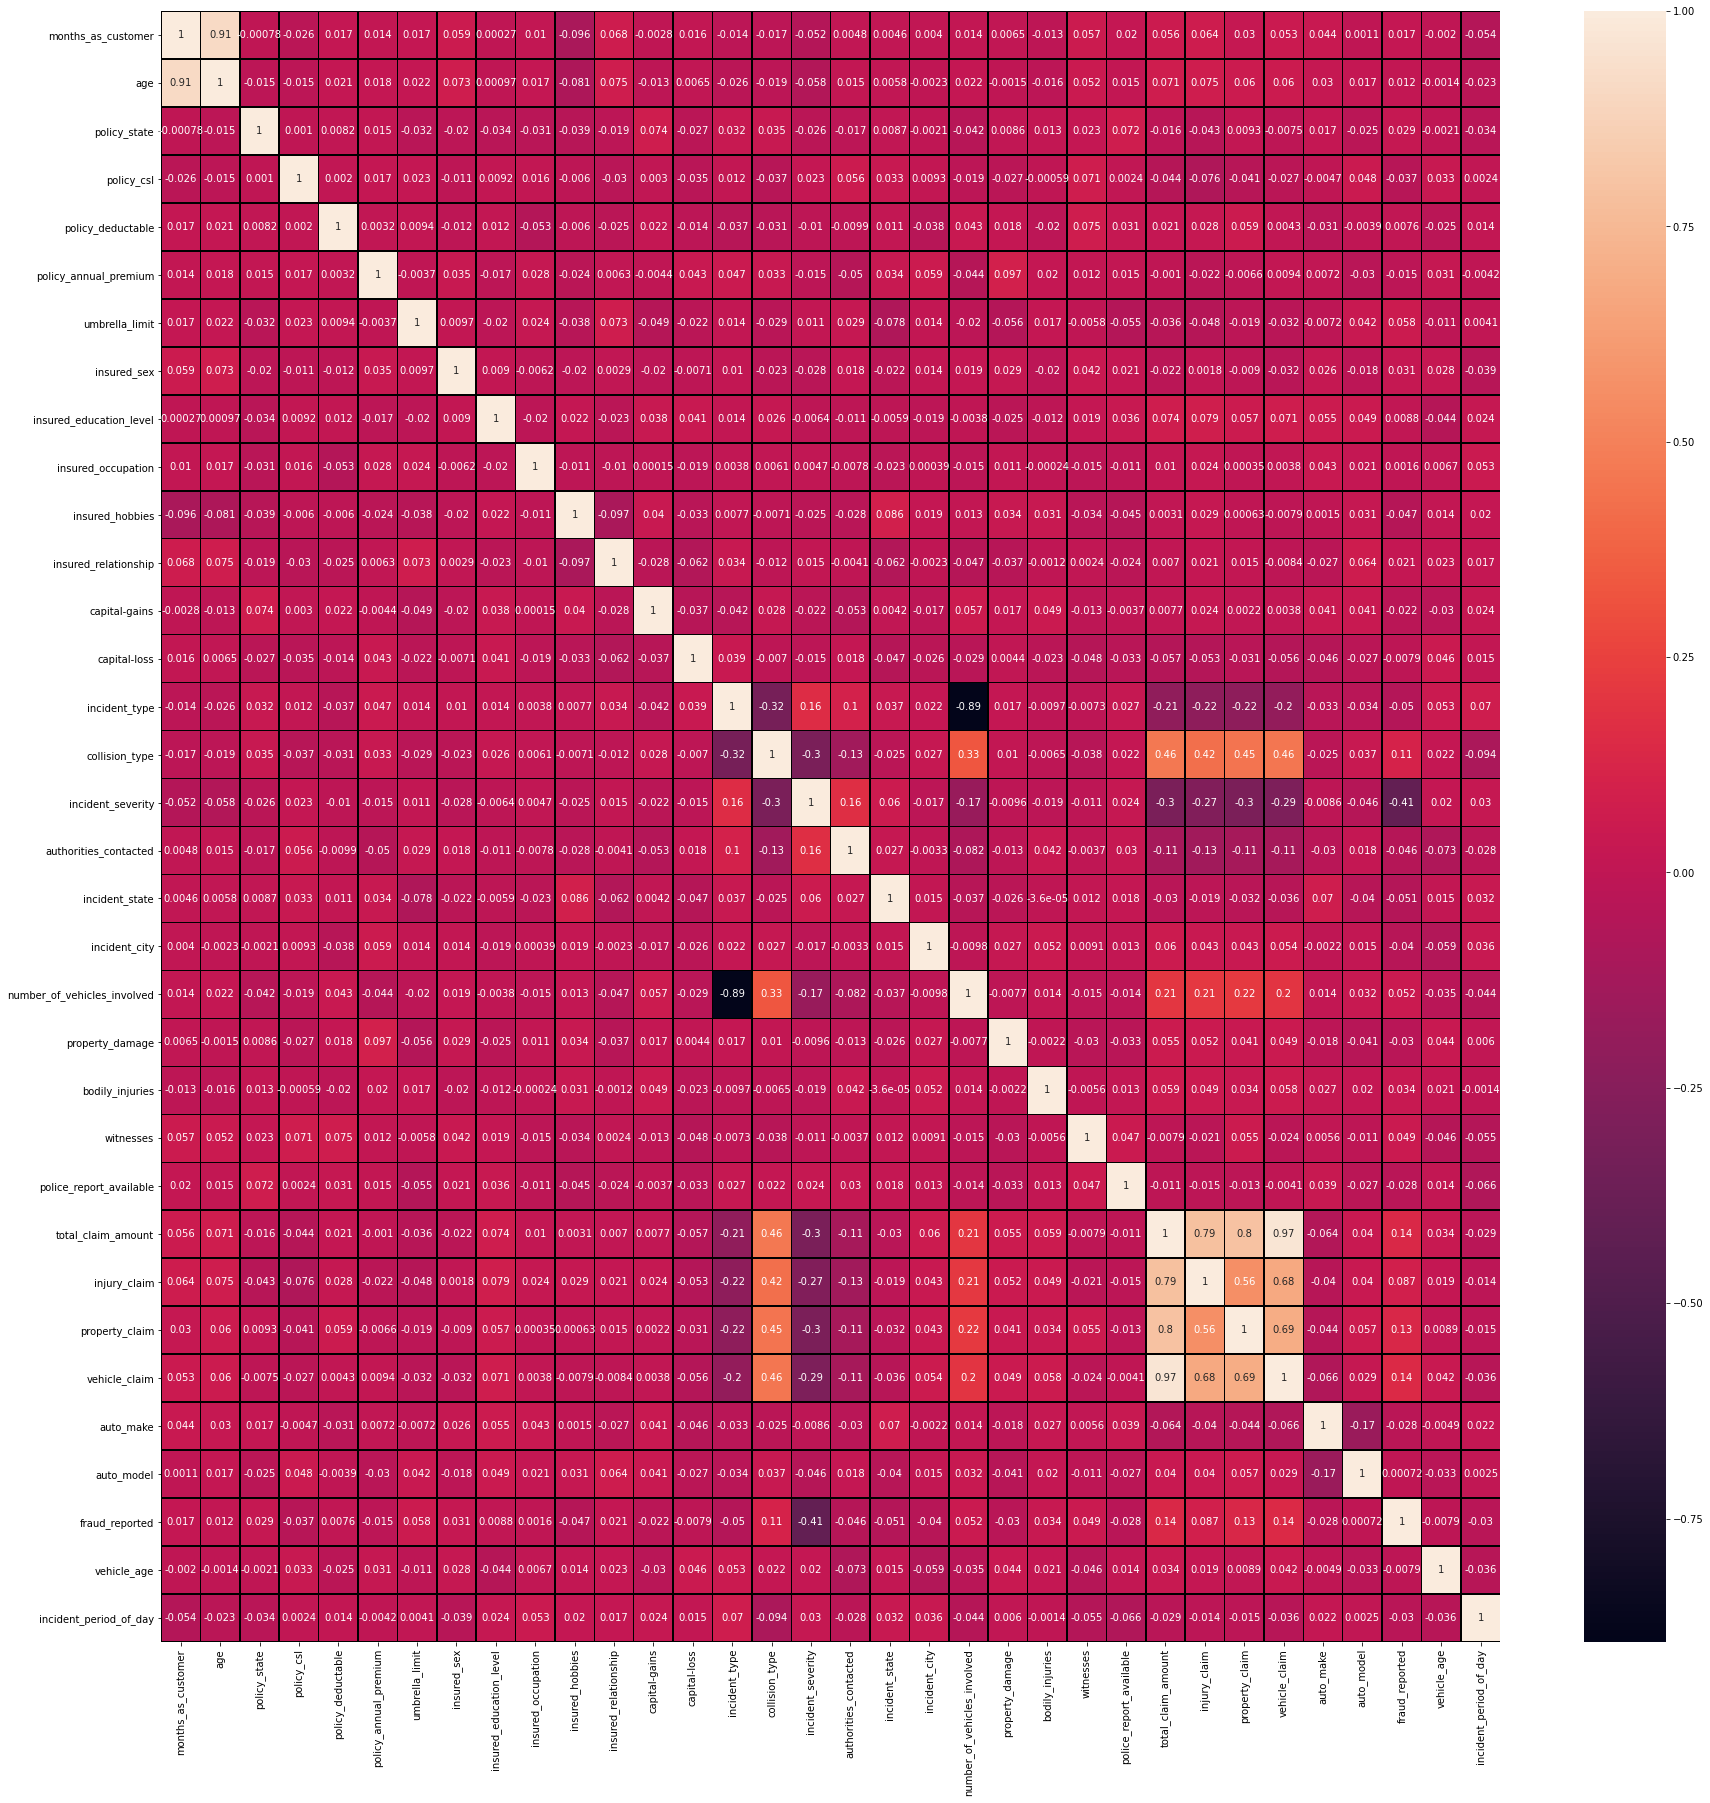

In [48]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black')

### Plotting Outliers 

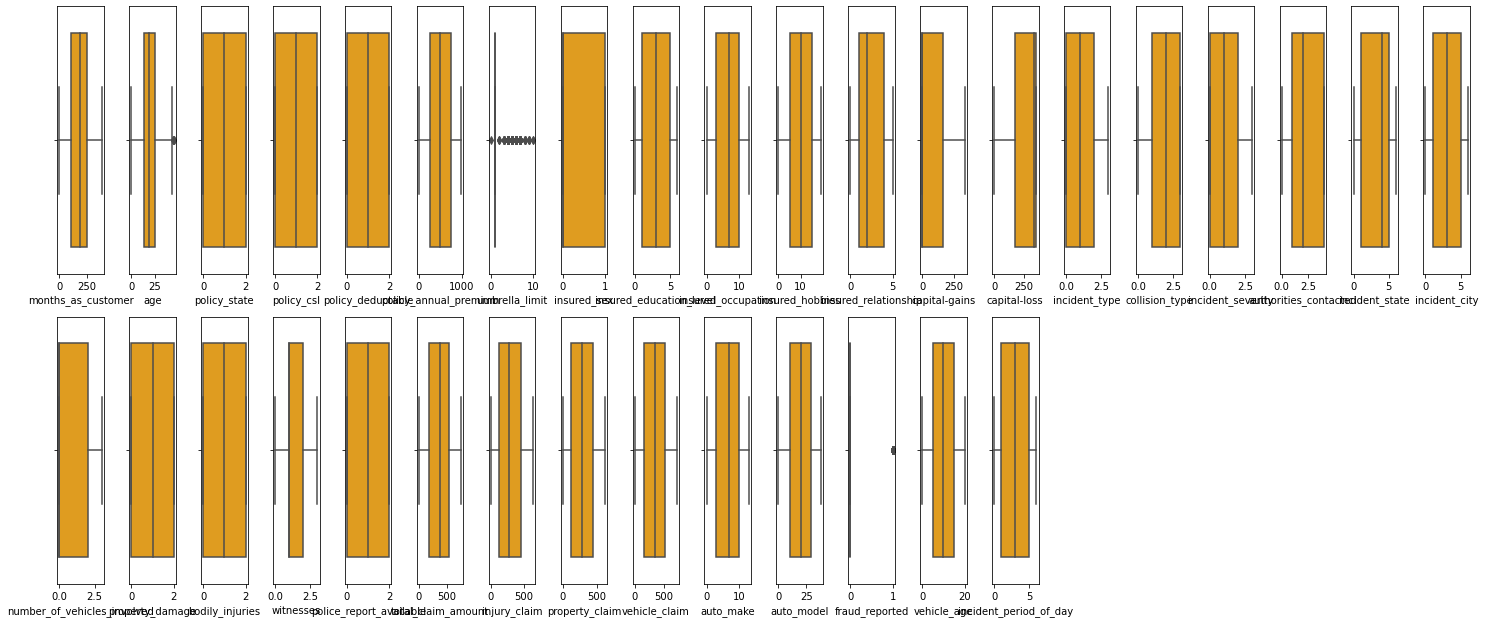

In [49]:
collist=df.columns.values
ncol=20
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color="orange",orient='v')
    plt.tight_layout()

In [50]:
from scipy.stats import zscore
import numpy as np

In [51]:
z=np.abs(zscore(df))
z

array([[1.14895094, 0.99083647, 1.18717314, ..., 1.74601919, 0.1834404 ,
        0.83316159],
       [0.2776003 , 0.33407345, 0.01685641, ..., 1.74601919, 0.31549088,
        0.53867418],
       [0.6137814 , 1.08891308, 1.18717314, ..., 0.57273139, 0.31549088,
        0.53867418],
       ...,
       [0.65384349, 0.54161057, 1.18717314, ..., 0.57273139, 1.5139238 ,
        0.83316159],
       [1.93016186, 2.52328351, 1.22088596, ..., 0.57273139, 1.18130295,
        1.45323135],
       [1.92014633, 2.3043625 , 1.18717314, ..., 0.57273139, 0.31549088,
        0.83316159]])

In [52]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 503, 657, 700, 875,
       922, 975], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int64))


In [53]:
df_new=df[(z<3) .all(axis=1)]
df_new

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,299,29,2,1,1,732,1,1,4,2,...,2,563,258,512,545,10,1,1,11,1
1,212,23,1,1,2,396,5,1,4,6,...,0,44,46,45,38,8,12,1,8,4
2,123,10,2,0,2,740,5,0,6,11,...,1,143,337,104,116,4,30,0,8,4
3,239,22,0,1,2,743,6,0,6,1,...,1,451,245,249,521,3,34,1,1,1
4,212,25,0,2,1,902,6,1,0,11,...,1,81,70,36,66,0,31,0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,19,2,2,1,577,1,0,5,2,...,0,705,624,379,664,6,6,0,9,2
996,266,22,0,0,1,765,1,0,6,9,...,0,760,630,608,714,13,28,0,0,5
997,119,15,2,1,0,691,3,0,5,1,...,2,507,324,330,554,11,19,0,19,1
998,377,43,0,2,2,652,5,1,0,5,...,2,224,168,170,256,1,5,0,17,6


In [54]:
print(df.shape)
print(df_new.shape)

(1000, 34)
(985, 34)


### Percentage of data loss

In [55]:
loss_percent=(1000-985)/1000*100
print(loss_percent)

1.5


In [56]:
df_new.skew()

months_as_customer             0.096656
age                            0.480506
policy_state                  -0.036054
policy_csl                     0.093953
policy_deductable              0.060667
policy_annual_premium         -0.001693
umbrella_limit                 1.902038
insured_sex                    0.144759
insured_education_level        0.004685
insured_occupation            -0.052412
insured_hobbies               -0.061536
insured_relationship           0.077333
capital-gains                  0.880109
capital-loss                  -0.807319
incident_type                  0.091063
collision_type                -0.194288
incident_severity              0.281858
authorities_contacted         -0.113349
incident_state                -0.151360
incident_city                  0.045660
number_of_vehicles_involved    0.509302
property_damage                0.108209
bodily_injuries                0.005614
witnesses                      0.018336
police_report_available        0.042570


umbrella_limit,capital-gains,capital-loss are positively skewed and rest are neagtively skewed

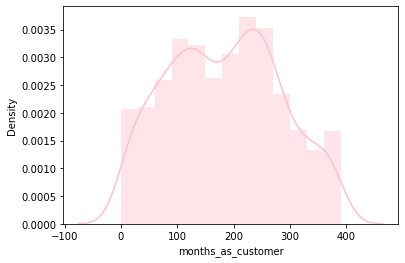

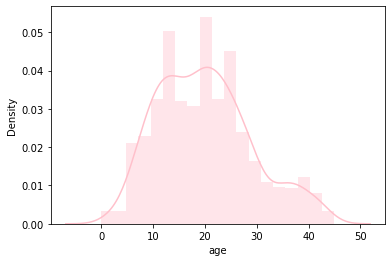

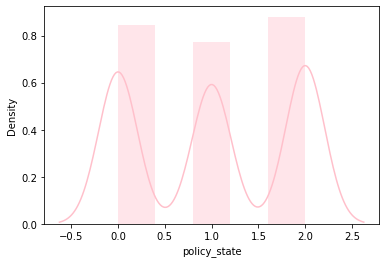

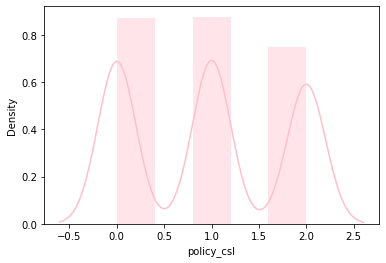

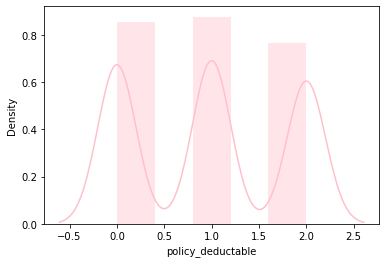

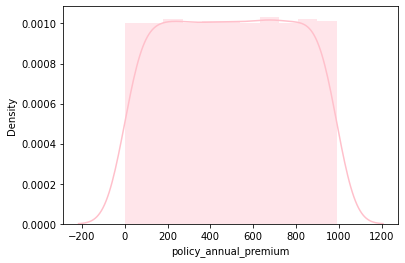

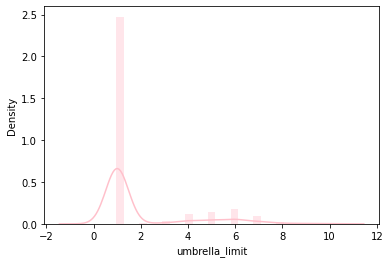

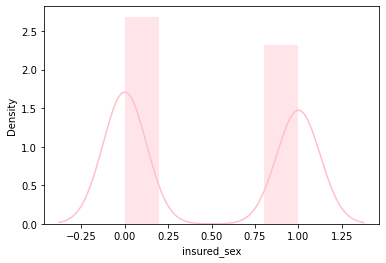

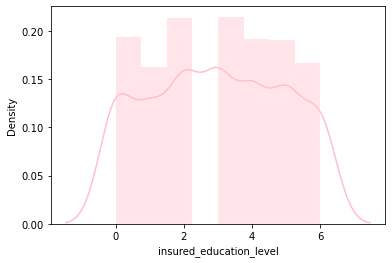

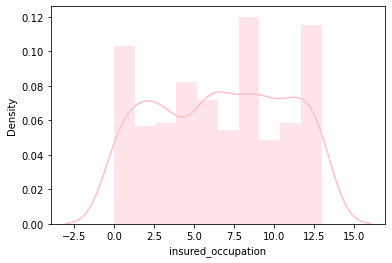

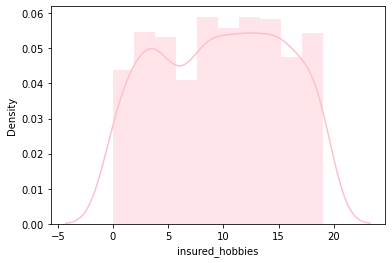

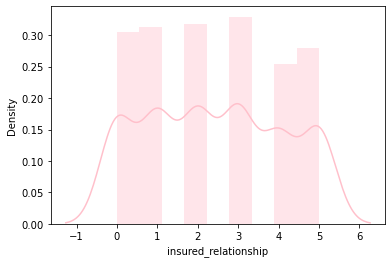

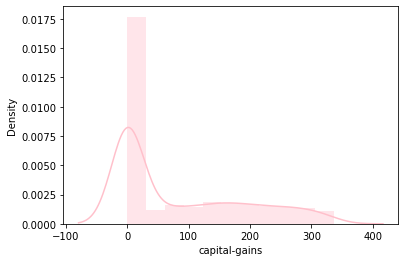

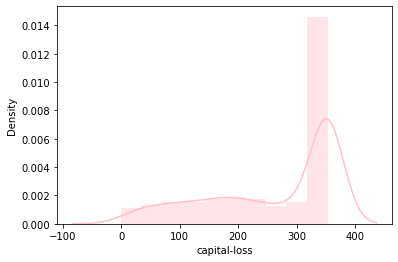

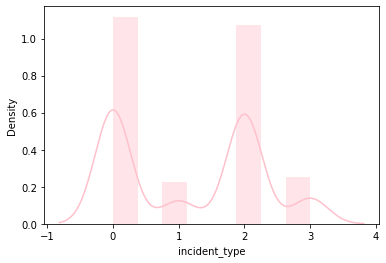

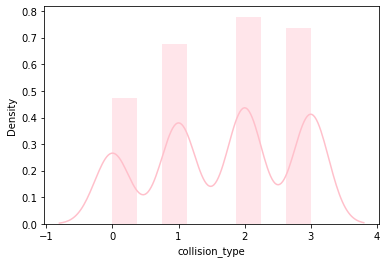

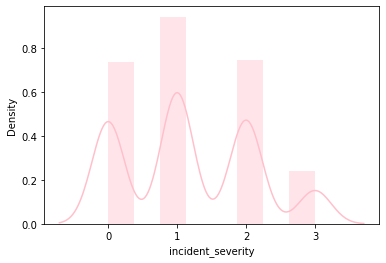

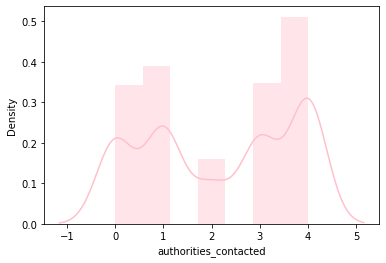

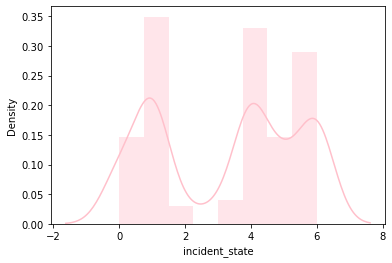

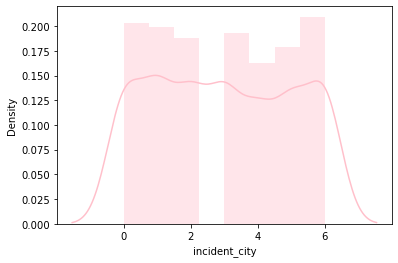

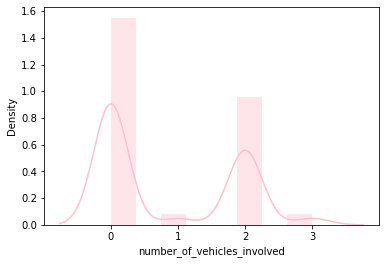

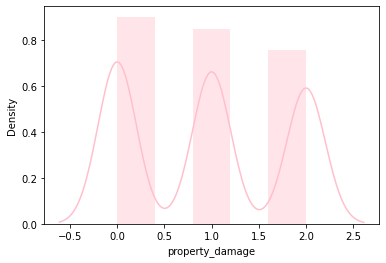

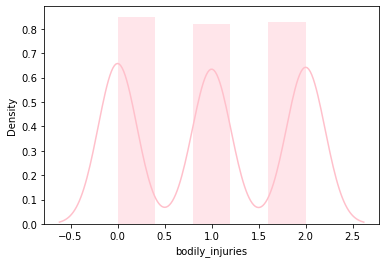

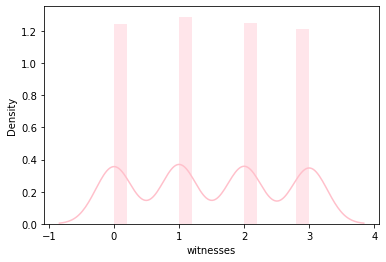

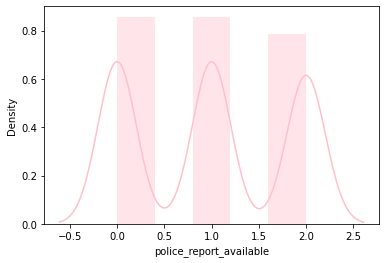

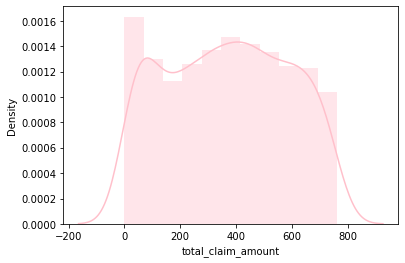

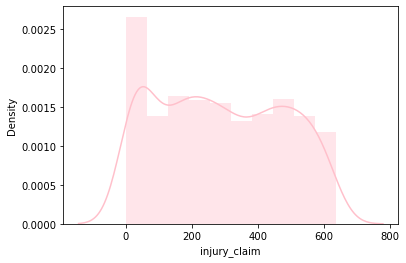

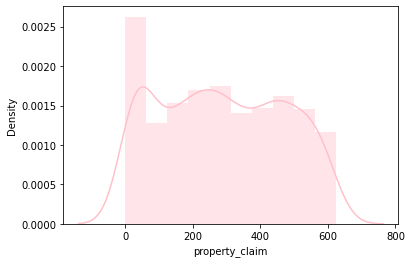

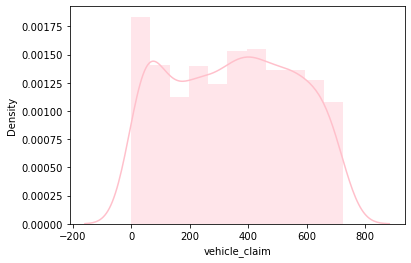

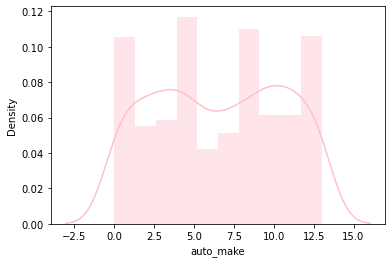

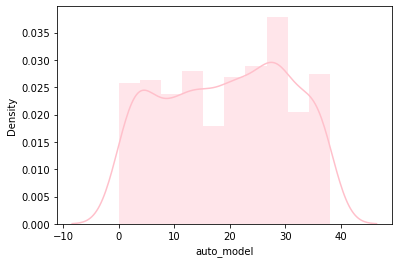

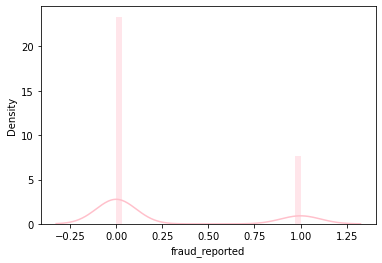

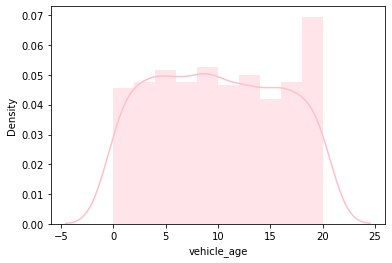

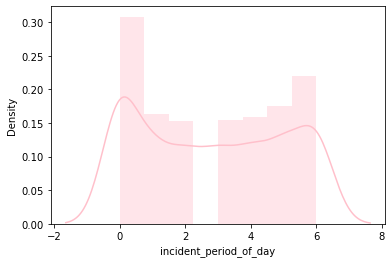

In [57]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i],color='pink')

In [58]:
x=df_new.drop(['fraud_reported'],axis=1)
y=df_new['fraud_reported']

In [59]:
x.shape

(985, 33)

In [60]:
y.shape

(985,)

In [61]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 985, dtype: int64

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [64]:
vif_calc()

    VIF Factor                     features
0    26.784326           months_as_customer
1    34.405623                          age
2     2.508494                 policy_state
3     2.418811                   policy_csl
4     2.474022            policy_deductable
5     4.036405        policy_annual_premium
6     2.105164               umbrella_limit
7     1.901083                  insured_sex
8     3.371968      insured_education_level
9     3.646564           insured_occupation
10    3.923510              insured_hobbies
11    3.080584         insured_relationship
12    1.670382                capital-gains
13    6.093404                 capital-loss
14    9.095730                incident_type
15    5.878122               collision_type
16    2.889762            incident_severity
17    3.166954        authorities_contacted
18    3.327755               incident_state
19    3.174611                incident_city
20    7.098275  number_of_vehicles_involved
21    2.381733              prop

vehicle_claim and total_claim_amount are high variation factor so for better output removing those varaibles

In [65]:
df_new=df_new.drop(['vehicle_claim','total_claim_amount'],axis=1)

In [66]:
x=df_new.drop(['fraud_reported'],axis=1)
y=df_new['fraud_reported']

In [67]:
y.value_counts()

0    744
1    241
Name: fraud_reported, dtype: int64

In [68]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [69]:
x

array([[ 1.10518143,  0.99373915,  1.14269011, ..., -1.8077551 ,
         0.27085715, -0.75157113],
       [ 0.3417534 ,  0.42295985,  0.06105674, ..., -0.57625941,
        -0.20894161,  0.61586558],
       [-0.53337777, -1.11449917,  1.14269011, ...,  0.95250811,
        -0.20894161,  0.61586558],
       ...,
       [-0.57605649, -0.45538469,  1.14269011, ...,  0.05568689,
         1.40145005, -0.75157113],
       [ 1.74027314,  2.14648084, -1.26509761, ..., -1.29884413,
         1.13408773,  1.31008973],
       [ 1.73236585,  1.99358851,  1.14269011, ..., -0.57625941,
        -0.20894161, -0.75157113]])

In [70]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
x=mn.fit_transform(x)
x

array([[0.82088735, 0.76582093, 1.        , ..., 0.04508919, 0.63233563,
        0.24583754],
       [0.63544962, 0.66319322, 0.5507771 , ..., 0.39457501, 0.49246927,
        0.74605047],
       [0.42287904, 0.38675379, 1.        , ..., 0.82842353, 0.49246927,
        0.74605047],
       ...,
       [0.41251232, 0.50526441, 1.        , ..., 0.57391488, 0.96191531,
        0.24583754],
       [0.97515201, 0.97308711, 0.        , ..., 0.18951289, 0.88397639,
        1.        ],
       [0.97323132, 0.94559664, 1.        , ..., 0.39457501, 0.49246927,
        0.24583754]])

In [71]:
print(x.shape)
print(y.shape)

(985, 31)
(985,)


In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [73]:

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(788, 31)
(788,)
(197, 31)
(197,)


In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
smt=SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)

In [76]:
x_train

array([[0.30008055, 0.4602917 , 0.5507771 , ..., 0.76148645, 0.84403741,
        0.60098355],
       [0.24908267, 0.36019901, 0.        , ..., 0.31104517, 0.54045865,
        0.        ],
       [0.78176598, 0.66319322, 1.        , ..., 0.        , 0.803386  ,
        0.        ],
       ...,
       [0.74291328, 0.76050714, 0.31600094, ..., 0.75592835, 0.66159513,
        0.69028529],
       [0.6590884 , 0.63168013, 0.39112315, ..., 0.14205169, 0.91596236,
        0.49803725],
       [0.6193622 , 0.61642111, 0.5507771 , ..., 0.43770453, 0.7137513 ,
        0.91215493]])

In [77]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1195    1
1196    1
1197    1
1198    1
1199    1
Name: fraud_reported, Length: 1200, dtype: int64

In [78]:
y_train.value_counts()

0    600
1    600
Name: fraud_reported, dtype: int64

In [79]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [80]:
print(lm.fit(x_train,y_train))
print(lm.score(x_train,y_train))

LogisticRegression()
0.765


In [81]:
pred=lm.predict(x_test)
print("predicted result score:",pred)
print("actual score:",y_test)

predicted result score: [1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1
 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0
 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 1]
actual score: 623    1
460    1
743    1
444    0
281    1
      ..
298    0
214    1
516    0
51     0
729    1
Name: fraud_reported, Length: 197, dtype: int64


In [82]:
print("Accuracy_score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('F1 score',f1_score(y_test,pred,average='micro'))

Accuracy_score: 0.7055837563451777
[[99 45]
 [13 40]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       144
           1       0.47      0.75      0.58        53

    accuracy                           0.71       197
   macro avg       0.68      0.72      0.68       197
weighted avg       0.77      0.71      0.72       197

F1 score 0.7055837563451777


In [83]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [84]:
mnb=MultinomialNB()
for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    mnb.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=mnb.predict(x_train)
    pred_test=mnb.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [85]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
pred_test=mnb.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.751269035532995
[[148   0]
 [ 49   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       148
           1       0.00      0.00      0.00        49

    accuracy                           0.75       197
   macro avg       0.38      0.50      0.43       197
weighted avg       0.56      0.75      0.64       197



In [86]:
from sklearn.model_selection import cross_val_score
pred_mnb = mnb.predict(x_test)

mnbcs= accuracy_score(y_test,pred_mnb)
for j in range(2,10):
    mnbscore = cross_val_score(mnb,x,y,cv=j)
    mnbc = mnbscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",mnbc*100 )
    print("accuracy_score is :-",mnbcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 75.53307277494682
accuracy_score is :- 75.1269035532995


At cv:- 3
Cross validation score is:- 75.5331504682828
accuracy_score is :- 75.1269035532995


At cv:- 4
Cross validation score is:- 75.5332280043448
accuracy_score is :- 75.1269035532995


At cv:- 5
Cross validation score is:- 75.53299492385787
accuracy_score is :- 75.1269035532995


At cv:- 6
Cross validation score is:- 75.53338260655332
accuracy_score is :- 75.1269035532995


At cv:- 7
Cross validation score is:- 75.53336228108265
accuracy_score is :- 75.1269035532995


At cv:- 8
Cross validation score is:- 75.53353658536585
accuracy_score is :- 75.1269035532995


At cv:- 9
Cross validation score is:- 75.53331479936986
accuracy_score is :- 75.1269035532995




In [87]:
dtc=DecisionTreeClassifier()
for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    dtc.fit(x_train,y_train)

    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [88]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)

dtc.score(x_train,y_train)
pred_test=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.766497461928934
1.0
[[128  20]
 [ 26  23]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       148
           1       0.53      0.47      0.50        49

    accuracy                           0.77       197
   macro avg       0.68      0.67      0.67       197
weighted avg       0.76      0.77      0.76       197



In [89]:
dtc=DecisionTreeClassifier() 
#pred_dtc = dtc.predict(x_test)
dtccs= accuracy_score(y_test,pred_test)
for j in range(2,10):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    dtcc = dtcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",dtcc*100 )
    print("accuracy_score is :-",dtccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 77.25597387819721
accuracy_score is :- 76.6497461928934


At cv:- 3
Cross validation score is:- 76.85428867966492
accuracy_score is :- 76.6497461928934


At cv:- 4
Cross validation score is:- 78.47626806227576
accuracy_score is :- 76.6497461928934


At cv:- 5
Cross validation score is:- 78.57868020304568
accuracy_score is :- 76.6497461928934


At cv:- 6
Cross validation score is:- 75.83887657058388
accuracy_score is :- 76.6497461928934


At cv:- 7
Cross validation score is:- 76.03850050658562
accuracy_score is :- 76.6497461928934


At cv:- 8
Cross validation score is:- 78.06845003933911
accuracy_score is :- 76.6497461928934


At cv:- 9
Cross validation score is:- 78.4857751830229
accuracy_score is :- 76.6497461928934




In [90]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier() 
params ={"criterion":['gini','entropy'],"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}
                
grid = GridSearchCV(dtc, param_grid = params, cv=4,verbose=1,n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

print("Best parameters are: ",grid.best_params_)

print("Accuracy score: ",grid.best_score_)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
DecisionTreeClassifier(max_depth=3, min_samples_split=5)
Best parameters are:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy score:  0.8274111675126904


In [91]:
for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 30 The model performs very well
At random state:- 30
Training score is:- 79.69543147208121
Testing score is:- 79.69543147208121
At random state 92 The model performs very well
At random state:- 92
Training score is:- 79.69543147208121
Testing score is:- 79.69543147208121
At random state 229 The model performs very well
At random state:- 229
Training score is:- 79.18781725888326
Testing score is:- 79.18781725888326
At random state 469 The model performs very well
At random state:- 469
Training score is:- 79.69543147208121
Testing score is:- 79.69543147208121
At random state 511 The model performs very well
At random state:- 511
Training score is:- 79.18781725888326
Testing score is:- 79.18781725888326
At random state 526 The model performs very well
At random state:- 526
Training score is:- 79.18781725888326
Testing score is:- 79.18781725888326
At random state 535 The model performs very well
At random state:- 535
Training score is:- 79.69543147208121
Testing score is:- 

In [92]:
lm=LogisticRegression() 
lm.fit(x_train,y_train)

lm.score(x_train,y_train)
pred_test=lm.predict(x_test)
pred_train=lm.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7918781725888325
0.8147208121827412
[[139   9]
 [ 32  17]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       148
           1       0.65      0.35      0.45        49

    accuracy                           0.79       197
   macro avg       0.73      0.64      0.66       197
weighted avg       0.77      0.79      0.77       197



In [93]:
svc=SVC()
for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [94]:
svc=SVC()
svcs= accuracy_score(y_test,pred_test)
for j in range(2,10):
    svcscore = cross_val_score(dtc,x,y,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 77.15702765546925
accuracy_score is :- 76.6497461928934


At cv:- 3
Cross validation score is:- 78.0719475127882
accuracy_score is :- 76.6497461928934


At cv:- 4
Cross validation score is:- 77.45795069286726
accuracy_score is :- 76.6497461928934


At cv:- 5
Cross validation score is:- 78.98477157360406
accuracy_score is :- 76.6497461928934


At cv:- 6
Cross validation score is:- 75.43237250554324
accuracy_score is :- 76.6497461928934


At cv:- 7
Cross validation score is:- 76.34534664929802
accuracy_score is :- 76.6497461928934


At cv:- 8
Cross validation score is:- 76.7530487804878
accuracy_score is :- 76.6497461928934


At cv:- 9
Cross validation score is:- 77.87600778426467
accuracy_score is :- 76.6497461928934




In [95]:
params={'kernel':['linear','rbf','poly','sigmoid']}
grid_search_cv = GridSearchCV(svc,param_grid=params,cv=10,verbose=1,n_jobs=-1)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'kernel': 'linear'}
SVC(kernel='linear')
0.8101834673263244


In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    knn.fit(x_train,y_train)

    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 854 The model performs very well
At random state:- 854
Training score is:- 79.18781725888326
Testing score is:- 79.18781725888326


In [97]:

knn= KNeighborsClassifier() 
knn.fit(x_train,y_train)

knn.score(x_train,y_train)
pred_test=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7411167512690355
0.8071065989847716
[[139  10]
 [ 41   7]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       149
           1       0.41      0.15      0.22        48

    accuracy                           0.74       197
   macro avg       0.59      0.54      0.53       197
weighted avg       0.68      0.74      0.69       197



In [98]:
knn= KNeighborsClassifier() 
#pred_dtc = dtc.predict(x_test)
knns= accuracy_score(y_test,pred_test)
for j in range(2,10):
    knnscore = cross_val_score(knn,x,y,cv=j)
    knnc = knnscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",knnc*100 )
    print("accuracy_score is :-",knns*100)
    print("\n")

At cv:- 2
Cross validation score is:- 73.19814805653128
accuracy_score is :- 74.11167512690355


At cv:- 3
Cross validation score is:- 74.31641831615885
accuracy_score is :- 74.11167512690355


At cv:- 4
Cross validation score is:- 73.19994404397485
accuracy_score is :- 74.11167512690355


At cv:- 5
Cross validation score is:- 73.90862944162437
accuracy_score is :- 74.11167512690355


At cv:- 6
Cross validation score is:- 73.50825326435083
accuracy_score is :- 74.11167512690355


At cv:- 7
Cross validation score is:- 72.79418150238818
accuracy_score is :- 74.11167512690355


At cv:- 8
Cross validation score is:- 73.30841856805665
accuracy_score is :- 74.11167512690355


At cv:- 9
Cross validation score is:- 73.50755259012138
accuracy_score is :- 74.11167512690355




In [99]:
knn=DecisionTreeClassifier()
params ={"criterion":['gini','entropy'],"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}
                
grid = GridSearchCV(knn, param_grid = params, cv=4,verbose=1,n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

print("Best parameters are: ",grid.best_params_)

print("Accuracy score: ",grid.best_score_)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=8)
Best parameters are:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 8}
Accuracy score:  0.8350253807106599


### Ensemble Model

In [100]:
# Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [101]:
rf=RandomForestClassifier(n_estimators=100,random_state=4)
ad=AdaBoostClassifier()

In [102]:
rf=RandomForestClassifier(n_estimators=100,random_state=4)
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    rf.fit(x_train,y_train)

    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [103]:
rf=RandomForestClassifier(n_estimators=100,random_state=4)
rf.fit(x_train,y_train)

rf.score(x_train,y_train)
pred_test=rf.predict(x_test)
pred_train=rf.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7918781725888325
1.0
[[139  10]
 [ 31  17]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       149
           1       0.63      0.35      0.45        48

    accuracy                           0.79       197
   macro avg       0.72      0.64      0.66       197
weighted avg       0.77      0.79      0.77       197



In [104]:
rf=RandomForestClassifier(n_estimators=100,random_state=4)
rfs= accuracy_score(y_test,pred_test)
for j in range(2,10):
    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",rfc*100 )
    print("accuracy_score is :-",rfs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 77.66577615066211
accuracy_score is :- 79.18781725888326


At cv:- 3
Cross validation score is:- 77.76645167667482
accuracy_score is :- 79.18781725888326


At cv:- 4
Cross validation score is:- 78.1709785721339
accuracy_score is :- 79.18781725888326


At cv:- 5
Cross validation score is:- 77.86802030456853
accuracy_score is :- 79.18781725888326


At cv:- 6
Cross validation score is:- 78.07156935205715
accuracy_score is :- 79.18781725888326


At cv:- 7
Cross validation score is:- 77.76812852800694
accuracy_score is :- 79.18781725888326


At cv:- 8
Cross validation score is:- 76.14493181222134
accuracy_score is :- 79.18781725888326


At cv:- 9
Cross validation score is:- 77.26253359280881
accuracy_score is :- 79.18781725888326




In [105]:
ad=AdaBoostClassifier()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    ad.fit(x_train,y_train)

    pred_train=ad.predict(x_train)
    pred_test=ad.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [106]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)

ad.score(x_train,y_train)
pred_test=ad.predict(x_test)
pred_train=ad.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7817258883248731
0.8616751269035533
[[137  12]
 [ 31  17]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.86       149
           1       0.59      0.35      0.44        48

    accuracy                           0.78       197
   macro avg       0.70      0.64      0.65       197
weighted avg       0.76      0.78      0.76       197



In [107]:
ad=AdaBoostClassifier()
ads= accuracy_score(y_test,pred_test)
for j in range(2,10):
    adscore = cross_val_score(rf,x,y,cv=j)
    adc = adscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",adc*100 )
    print("accuracy_score is :-",rfs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 77.66577615066211
accuracy_score is :- 79.18781725888326


At cv:- 3
Cross validation score is:- 77.76645167667482
accuracy_score is :- 79.18781725888326


At cv:- 4
Cross validation score is:- 78.1709785721339
accuracy_score is :- 79.18781725888326


At cv:- 5
Cross validation score is:- 77.86802030456853
accuracy_score is :- 79.18781725888326


At cv:- 6
Cross validation score is:- 78.07156935205715
accuracy_score is :- 79.18781725888326


At cv:- 7
Cross validation score is:- 77.76812852800694
accuracy_score is :- 79.18781725888326


At cv:- 8
Cross validation score is:- 76.14493181222134
accuracy_score is :- 79.18781725888326


At cv:- 9
Cross validation score is:- 77.26253359280881
accuracy_score is :- 79.18781725888326




In [108]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print(f.score(x_train,y_train))
    print('Accuracy::',accuracy_score(y_test,pred))
    print('confusion matrix\n',confusion_matrix(y_test,pred)) 
    print('classification report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred,average='micro'))

In [109]:
fun(rf)

1.0
Accuracy:: 0.7918781725888325
confusion matrix
 [[139  10]
 [ 31  17]]
classification report
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       149
           1       0.63      0.35      0.45        48

    accuracy                           0.79       197
   macro avg       0.72      0.64      0.66       197
weighted avg       0.77      0.79      0.77       197

F1 score 0.7918781725888325


In [110]:
fun(ad)

0.8616751269035533
Accuracy:: 0.7817258883248731
confusion matrix
 [[137  12]
 [ 31  17]]
classification report
               precision    recall  f1-score   support

           0       0.82      0.92      0.86       149
           1       0.59      0.35      0.44        48

    accuracy                           0.78       197
   macro avg       0.70      0.64      0.65       197
weighted avg       0.76      0.78      0.76       197

F1 score 0.7817258883248731


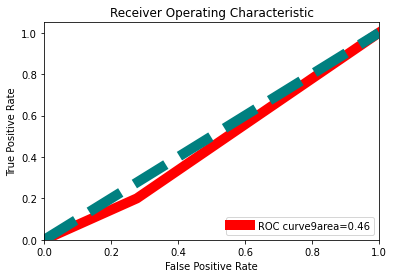

In [111]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='red',lw=10,label='ROC curve9area=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='teal',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Model Saving 

In [112]:
import pickle
filename = "Claims.pkl"
pickle.dump(ad,open(filename,'wb'))

In [113]:
a=np.array(y_test)
predicted=np.array(ad.predict(x_test))
df_fraud=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [114]:
df_fraud

,orginal,predicted
0,1,1
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
192,0,0
193,0,0
194,1,0
195,1,1
